# Exercise 1

# 1)This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [9]:
require(ISLR)
# load package ISLR

# (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [10]:
summary(Weekly)
?Weekly
# Hiện thông tin và tổng quan về Weekly

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

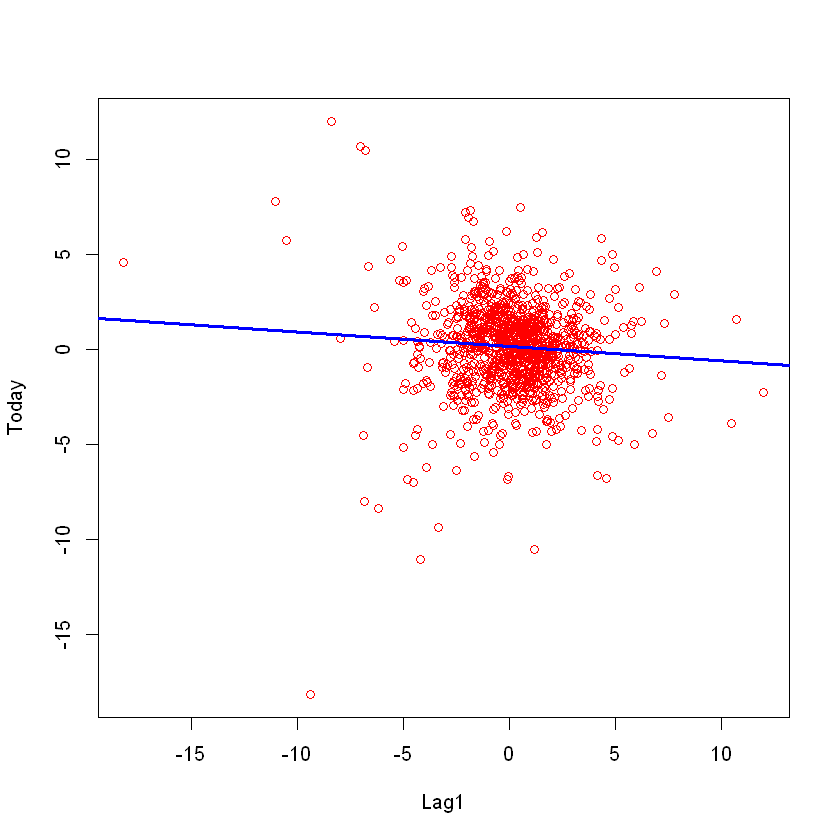

In [11]:
plot(Today~Lag1, col= "red", data=Weekly)
lmModel = lm(Today~Lag1, data=Weekly)
abline(lmModel, lwd= 3, col= "blue")
# linear model giữa Today và Lag1

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

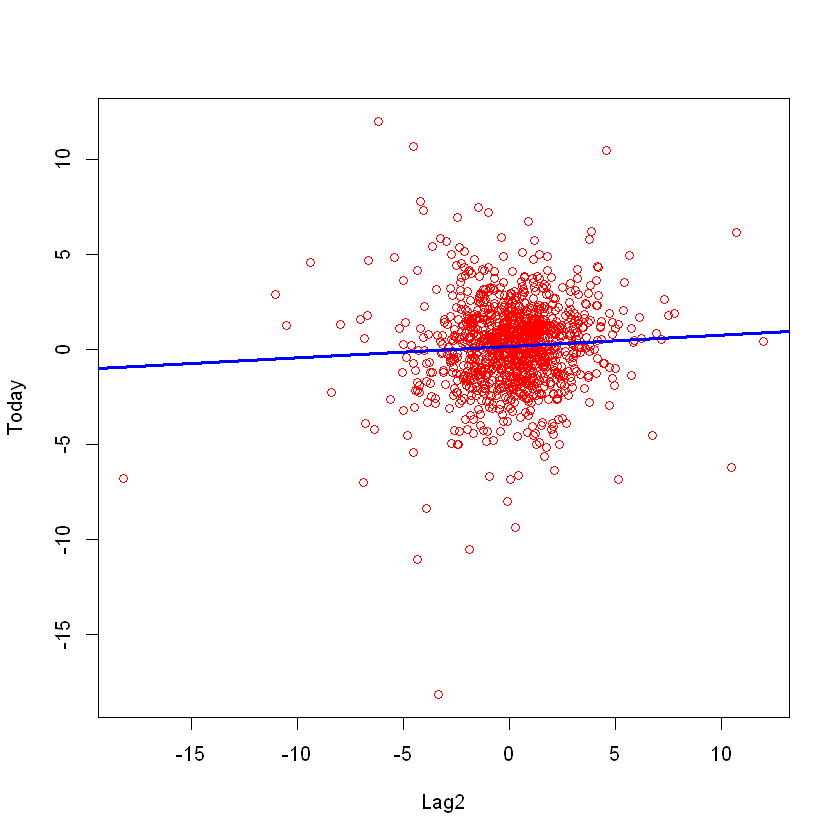

In [12]:
plot(Today~Lag2, col= "red", data=Weekly)
lmModel = lm(Today~Lag2, data=Weekly)
abline(lmModel, lwd= 3, col= "blue")
# linear model giữa Today và Lag2

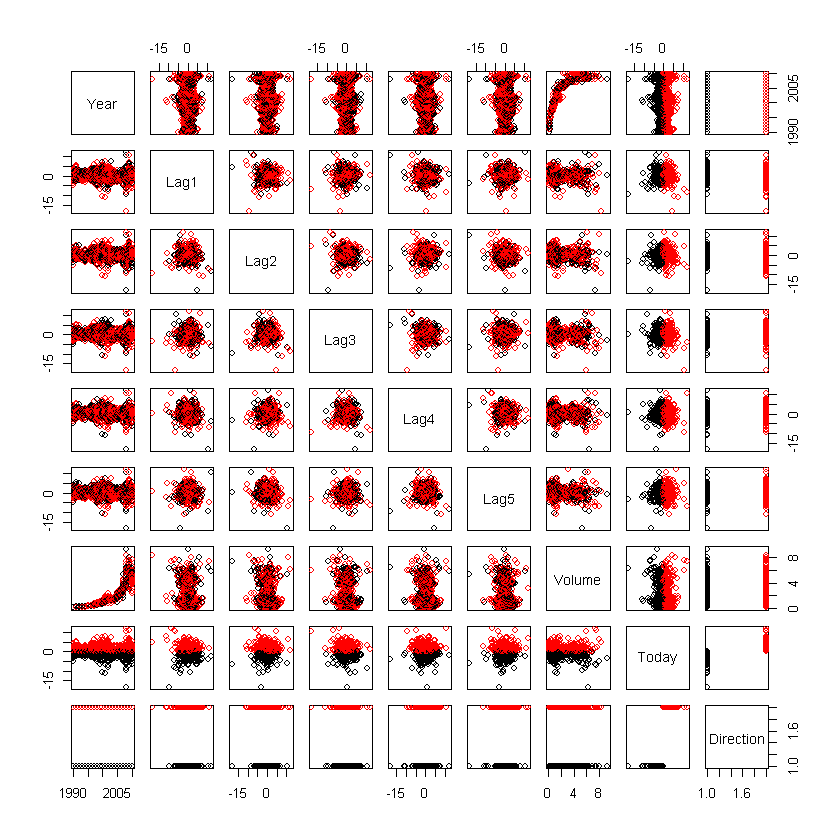

In [13]:
pairs(Weekly, col=Weekly$Direction) 
# scatterplots for each variable

# (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors.
# Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [14]:
LogisticModel = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data=Weekly, family=binomial(link="logit"))
summary(LogisticModel)
# Tạo model logistic regression với các feature là 5 biến Lag (x) và giá trị dự đoán (y) là Direction 
# (dự đoán lợi nhuận tăng hay giảm dựa trên tỉ lệ hoàn vốn của 5 tuần trước đó và khối lượng cổ phiếu giao dịch)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial(link = "logit"), data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Trong 6 feature dự đoán, chỉ có Lag2 là có dấu hiệu thống kê để dự đoán Direction

# (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [15]:
probs = predict(LogisticModel, type="response")    # predict với model logistic đã tạo
preds = rep("Down", 1089)                          # tạo mảng với tất cả giá trị là down
preds[probs > 0.5] = "Up"                          # với những giá trị model dự đoán > 0.5 sẽ đánh dấu up vào mảng trên
table(preds, Weekly$Direction)                     # Hiện confusion matrix

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

      
preds  Down  Up
  Down   54  48
  Up    430 557

dựa trên kết quả của confusion matrix, chúng ta dự đoán hầu hết các trường hợp là Up.
54 true positive  
48 false positive
430 false negative
557 true negative

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

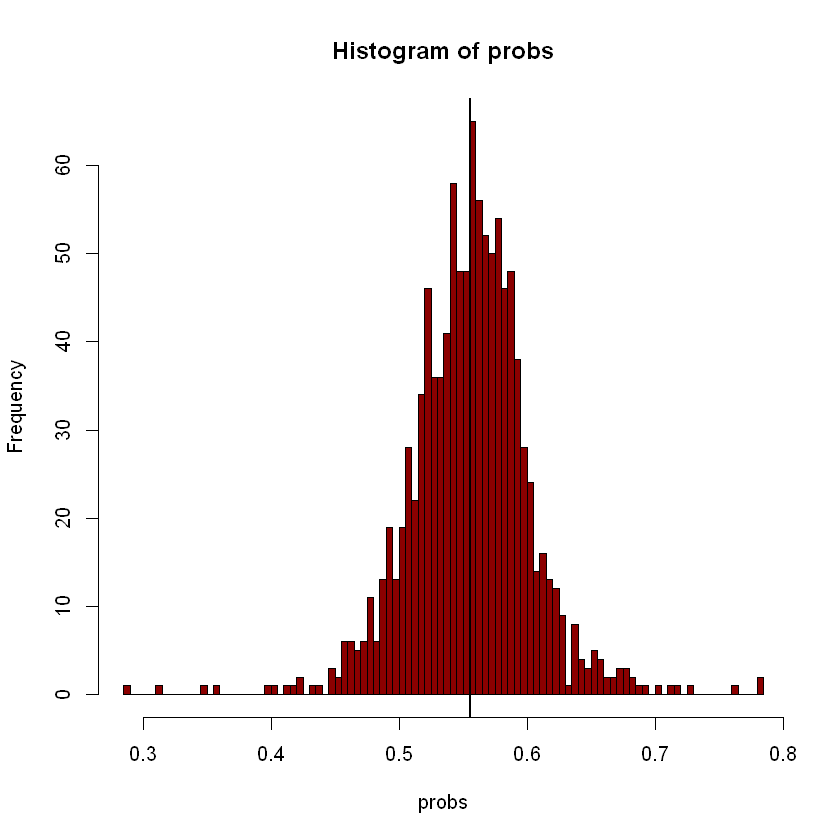

In [16]:
hist(probs, breaks= 100, col= "darkred")
abline(v = mean(probs), lwd = 2)
# vẽ histogram của kết quả dự đoán và vẽ đường thẳng ở median của kết quả dự đoán

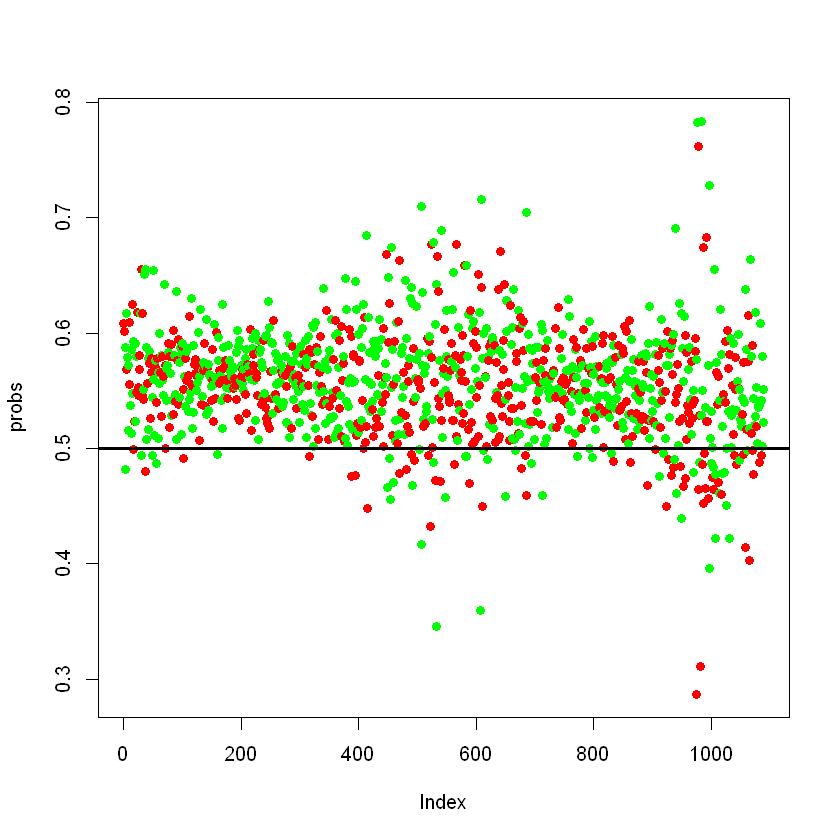

In [17]:
plot(probs, col= ifelse(Weekly$Direction=="Down", "red","green"), pch=16)
abline(h = 0.5, lwd= 3)

# (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [18]:
training.data = Weekly[Weekly$Year<2009,]
test.data = Weekly[Weekly$Year>2008,]
simpglm = glm(Direction~Lag2, data= training.data, family = "binomial")
summary(simpglm)
# lấy data training từ những dữ liệu có năm nhỏ hơn 2009, và test trên tập dữ liệu từ 2009 trở đi
# tạo model logistic regression với data training và hiện tóm lượt về model

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = training.data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

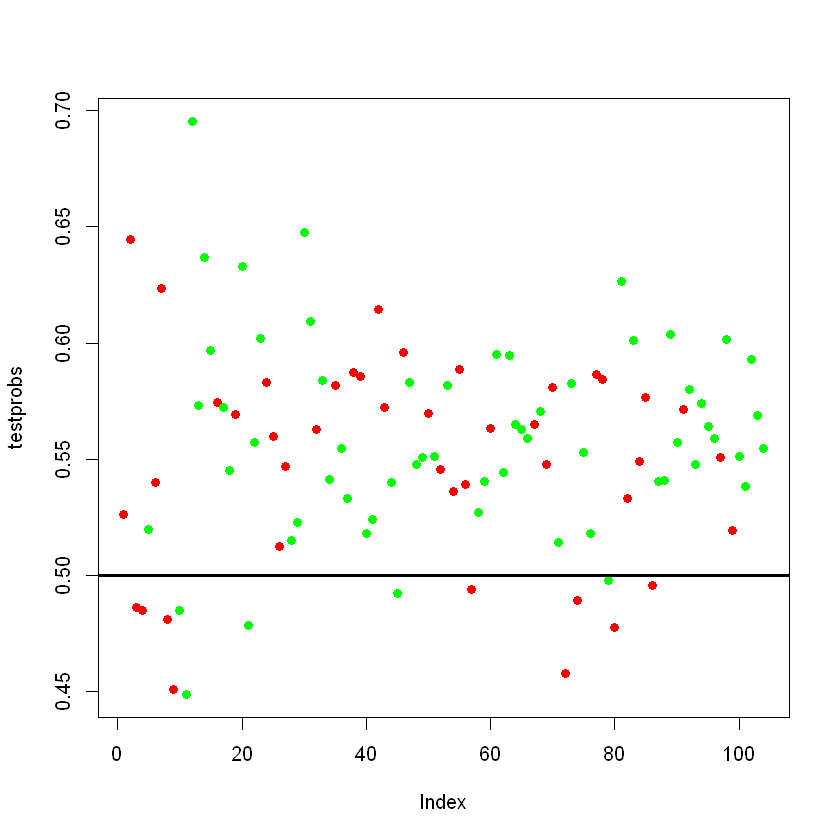

In [19]:
testprobs = predict(simpglm, type="response", newdata = test.data)
testdirs = Weekly$Direction[Weekly$Year>2008]
plot(testprobs, col= ifelse(Weekly$Direction[Weekly$Year>2008]=="Down", "red","green"), pch=16)
abline(h = 0.5, lwd= 3)
# predict vối model trên tập test và vẽ plot

In [20]:
testpreds = rep("Down", 104)
testpreds[testprobs>0.5] = "Up"
mean(probs)

[1] 0.5555556

In [21]:
table(testpreds, testdirs)
# Confussion matrix

         testdirs
testpreds Down Up
     Down    9  5
     Up     34 56

The test error rate for the logistic regression is 37.5%

# (e) Repeat (d) using LDA

In [22]:
require(MASS)
lda.fit = lda(Direction~Lag2, data= training.data)
lda.fit

Call:
lda(Direction ~ Lag2, data = training.data)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

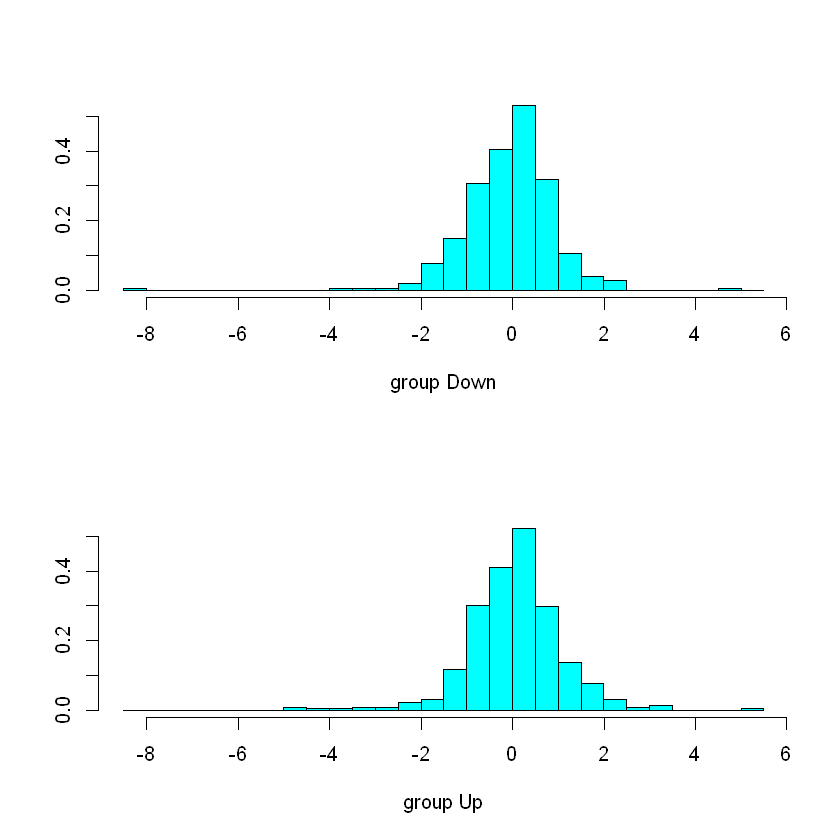

In [23]:
plot(lda.fit)

In [24]:
lda.pred = predict(lda.fit, newdata=test.data, type="response")
lda.class = lda.pred$class
table(lda.class, test.data$Direction)
# Confussion matrix

         
lda.class Down Up
     Down    9  5
     Up     34 56

The error rate with the Logistic Regression 37,5%

# (f) Repeat (d) using QDA.

In [25]:
require(class)
qda.fit = qda(Direction~Lag2, data= training.data)
qda.fit

Loading required package: class


Call:
qda(Direction ~ Lag2, data = training.data)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [26]:
qda.pred = predict(qda.fit, newdata=test.data, type="response")
qda.class = qda.pred$class
table(qda.class, test.data$Direction)

         
qda.class Down Up
     Down    0  0
     Up     43 61

The error rate for the QDA seems to be the worst out of all the models: 41,35%.

# 2 In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

# (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [27]:
auto = Auto                                      # đọc dữ liệu
auto$mpg01 = rep(0, length(auto$mpg))            # tạo thêm cột mpg01 với tất cả các giá trị = 0
auto$mpg01[auto$mpg>median(auto$mpg)] = 1        # với những hàng có giá trị mgp lớn hơn median của toàn cột thì mpg01 = 1
head(auto)                                       # xuất phần đầu của dữ liệu

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0
17,8,302,140,3449,10.5,70,1,ford torino,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


# (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and oxplots may be useful tools to answer this question. Describe your indings.

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

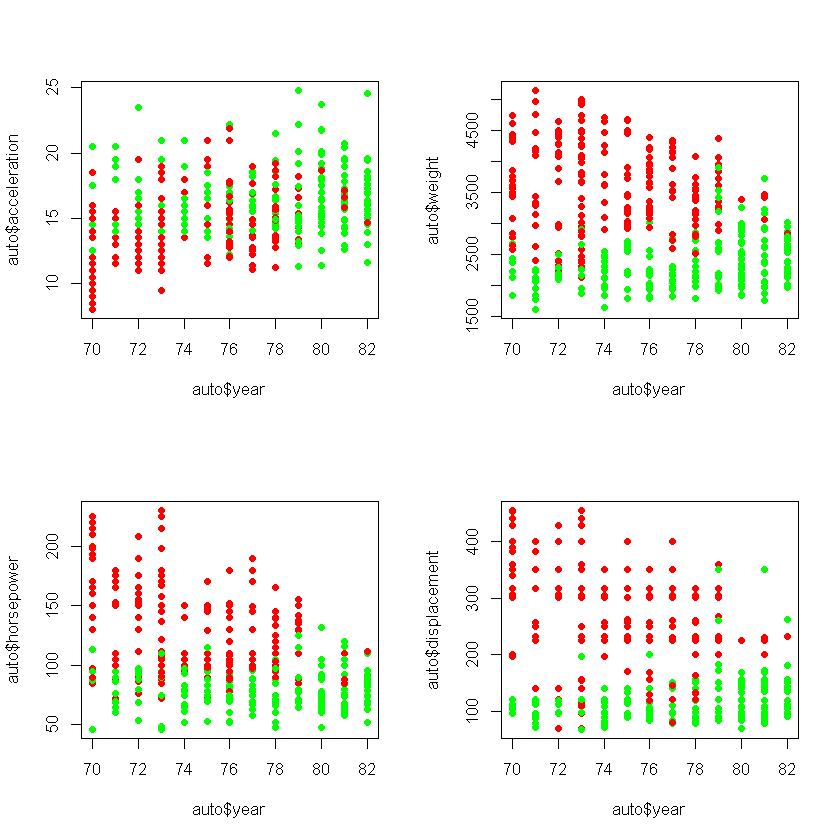

In [28]:
par(mfrow=c(2,2))
plot(auto$year, auto$acceleration,, col= ifelse(auto$mpg01==0, "red", "green"), pch = 16)
plot(auto$year, auto$weight, col= ifelse(auto$mpg01==0, "red", "green"), pch = 16)
plot(auto$year, auto$horsepower, col= ifelse(auto$mpg01==0, "red", "green"), pch = 16)
plot(auto$year, auto$displacement, col= ifelse(auto$mpg01==0, "red", "green"), pch = 16)
# vẽ các plot của year với các feature acceleration, weight, horsepower, displacement và hiện đỏ nếu giá trị mpg01 là 0,
#                                                                                         hoặc xanh nếu là 1.

In [29]:
cor(na.omit(auto[-9]))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


những feature hữu ích trong việc dự đoán mpg01 là những feature mà khi vẽ ra ta có thể thấy plot hiển thị phân chia rõ ràng giữa màu xanh và màu đỏ của các chấm. Đó là displacement,weight, cylinders và year.

# (c) Split the data into a training set and a test set.

In [30]:
idxs <- sample(1:dim(auto)[1], size=dim(auto)[1]*0.75)
training <- auto[idxs,]
test = auto[-idxs,]
# chia dữ liệu thành 75% training và 25% test và gán vào cho 2 biến, training là từ đầu đến 75% size, test là 25% ở cuối

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

# (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [31]:
lda.fit2 = lda(mpg01~displacement+weight+cylinders+year, data=training)
lda.fit2
# model fit tập training

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Call:
lda(mpg01 ~ displacement + weight + cylinders + year, data = training)

Prior probabilities of groups:
        0         1 
0.4863946 0.5136054 

Group means:
  displacement   weight cylinders     year
0     275.0769 3628.182  6.755245 74.37762
1     113.8907 2314.212  4.139073 77.39073

Coefficients of linear discriminants:
                      LD1
displacement  0.003443577
weight       -0.001200378
cylinders    -0.521018102
year          0.101183388

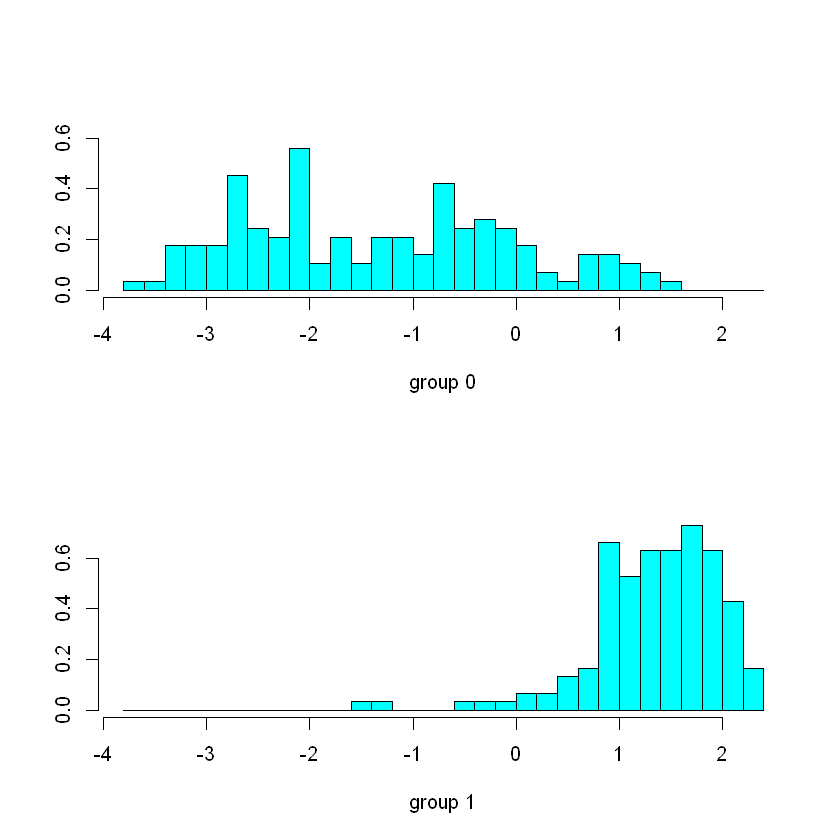

In [32]:
plot(lda.fit2)

In [33]:
pred.lda2 = predict(lda.fit2, newdata=test, type="response")$class
table(pred.lda2, test$mpg01)
# sử dụng confusion matrix để đánh giá performance 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

         
pred.lda2  0  1
        0 48  2
        1  5 43

model khá tốt

# (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [34]:
qda.fit2 = qda(mpg01~displacement+weight+cylinders+year, data=training)
qda.fit2

Call:
qda(mpg01 ~ displacement + weight + cylinders + year, data = training)

Prior probabilities of groups:
        0         1 
0.4863946 0.5136054 

Group means:
  displacement   weight cylinders     year
0     275.0769 3628.182  6.755245 74.37762
1     113.8907 2314.212  4.139073 77.39073

In [35]:
pred.qda2 = predict(qda.fit2, newdata=test, type="response")$class
table(pred.qda2, test$mpg01)

         
pred.qda2  0  1
        0 49  7
        1  4 38

# (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [36]:
logreg = glm(mpg01~displacement+weight+cylinders+year, family="binomial", data=training)
summary(logreg)


Call:
glm(formula = mpg01 ~ displacement + weight + cylinders + year, 
    family = "binomial", data = training)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.32612  -0.11966   0.05442   0.27147   3.15807  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.621e+01  5.350e+00  -3.030  0.00245 ** 
displacement -6.246e-03  1.104e-02  -0.566  0.57150    
weight       -4.154e-03  9.859e-04  -4.213 2.52e-05 ***
cylinders    -1.683e-01  4.502e-01  -0.374  0.70857    
year          3.919e-01  8.015e-02   4.890 1.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 407.35  on 293  degrees of freedom
Residual deviance: 124.63  on 289  degrees of freedom
AIC: 134.63

Number of Fisher Scoring iterations: 7


In [37]:
probs = predict(logreg, test, type="response")
preds = rep(0, dim(test)[1])
preds[probs>0.5]=1            
table(preds, auto$mpg01[-idxs])

     
preds  0  1
    0 48  4
    1  5 41

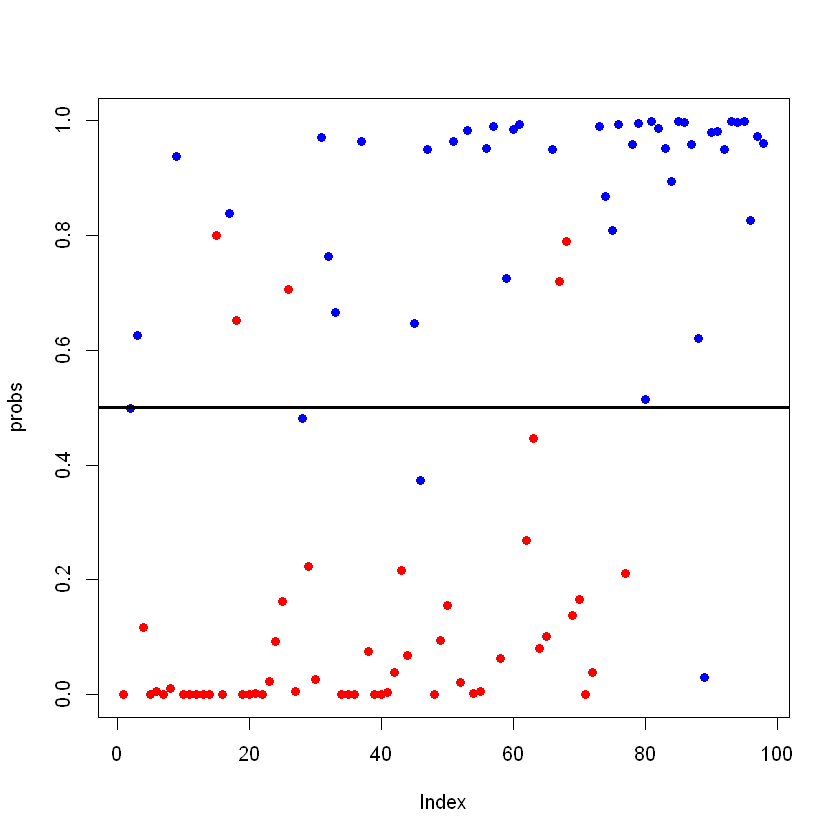

In [38]:
par(mfrow=c(1,1))
plot(probs, col= ifelse(test$mpg01==0, "red", "blue"), pch = 16)
abline(h=0.5, lwd=3)

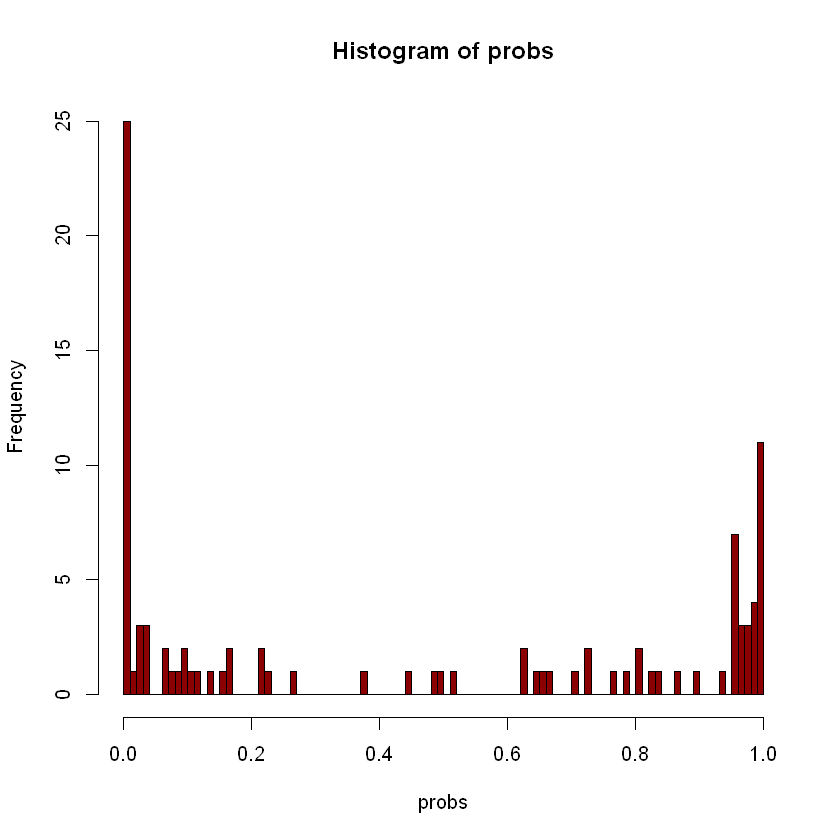

In [39]:
hist(probs, breaks = 100, col = "darkred")